### Take Home
#### name: Pranisaa Charnparttaravanit
Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Import data

In [151]:
df = pd.read_csv("airbnb.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


### Data Preparation

For this assignment, i decided to use only data on latitude, longtidue, price and review_per_month

In [152]:
col = ['id','name','host_id','host_name','neighbourhood_group',
       'neighbourhood','room_type','availability_365',
       'last_review','minimum_nights','calculated_host_listings_count','number_of_reviews']
df.drop(col, axis=1, inplace=True)

In [153]:
df

,latitude,longitude,price,reviews_per_month
0,1.44255,103.79580,83,0.01
1,1.33235,103.78521,81,0.28
2,1.44246,103.79667,69,0.20
3,1.34541,103.95712,206,0.15
4,1.34567,103.95963,94,0.22
...,...,...,...,...
7902,1.27973,103.78751,100,NaN
7903,1.29269,103.82623,550,NaN
7904,1.31286,103.85996,58,NaN
7905,1.29543,103.83801,56,NaN


### Drop Nan

In [154]:
df = df.dropna()

In [155]:
df

,latitude,longitude,price,reviews_per_month
0,1.44255,103.79580,83,0.01
1,1.33235,103.78521,81,0.28
2,1.44246,103.79667,69,0.20
3,1.34541,103.95712,206,0.15
4,1.34567,103.95963,94,0.22
...,...,...,...,...
7715,1.31410,103.90317,699,6.00
7728,1.34063,103.88219,60,1.00
7752,1.30677,103.76224,56,1.00
7766,1.30074,103.84742,237,1.00


In [156]:
df.isna().sum()

latitude             0
longitude            0
price                0
reviews_per_month    0
dtype: int64

### Visualization

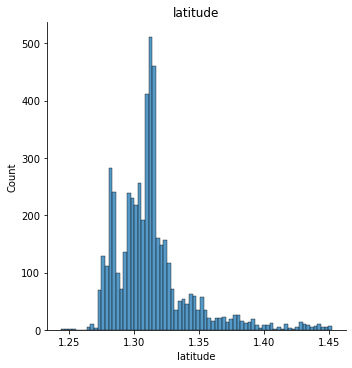

In [136]:
sns.displot(df.latitude)
_ = plt.title('latitude')

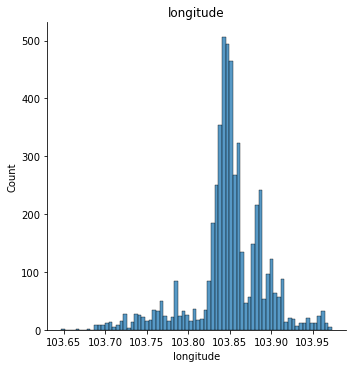

In [137]:
sns.displot(df.longitude)
_ = plt.title('longitude')

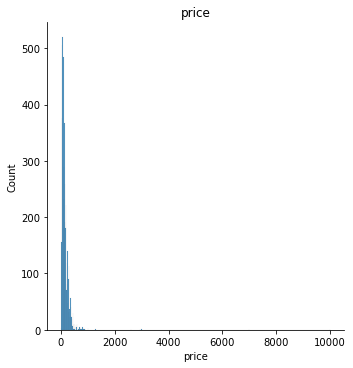

In [138]:
sns.displot(df.price)
_ = plt.title('price')

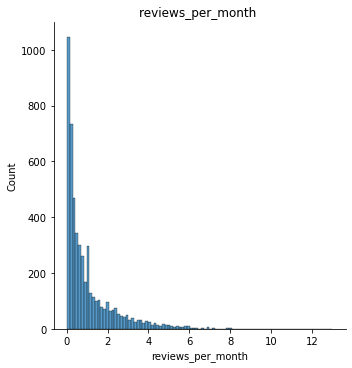

In [159]:
sns.displot(df.reviews_per_month )
_ = plt.title('reviews_per_month ')

### Performing K-means

In [143]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

### Find a suitable k

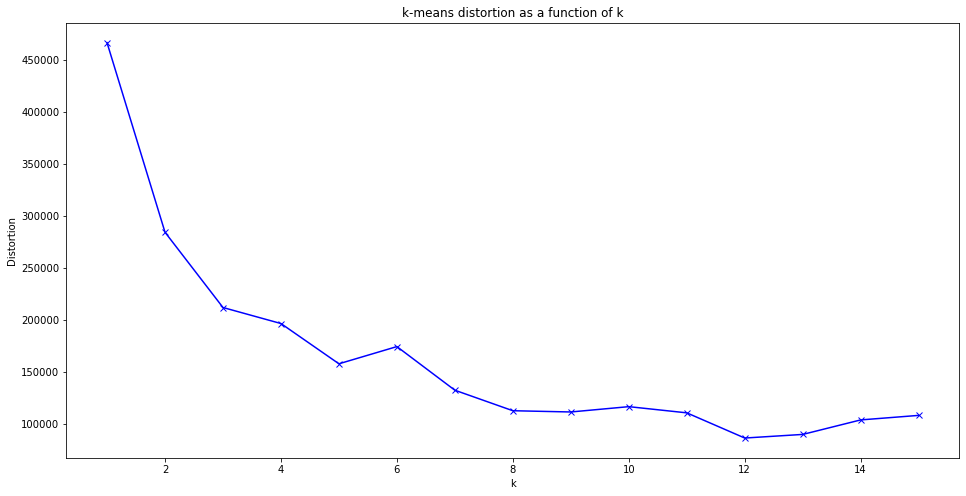

In [144]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 15
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

# sudden increase, because of initialization ( initial cluster center is diffferent, its a cmpletely different arrangement not the existing cluster)

From the plot shown above, we can see the sloop of the grpah decreasing exponentially with the 'elbow' at around 5.
Therefore, the suitable k for this dataset is assumed to be at 5

In [161]:
#chosen k = 5
k = 5
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

In [162]:
df['label'].unique()

array([0., 3., 4., 2., 1.])

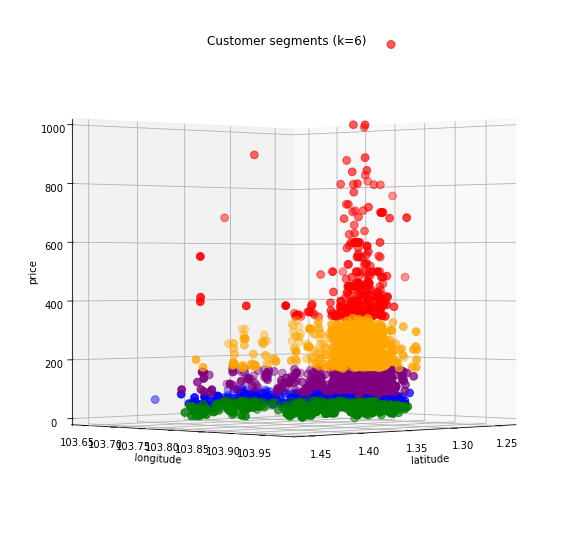

In [168]:
# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['latitude'][df.label == 0], df["longitude"][df.label == 0], df["price"][df.label == 0], c='blue', s=60)
ax.scatter(df['latitude'][df.label == 1], df["longitude"][df.label == 1], df["price"][df.label == 1], c='red', s=60)
ax.scatter(df['latitude'][df.label == 2], df["longitude"][df.label == 2], df["price"][df.label == 2], c='green', s=60)
ax.scatter(df['latitude'][df.label == 3], df["longitude"][df.label == 3], df["price"][df.label == 3], c='orange', s=60)
ax.scatter(df['latitude'][df.label == 4], df["longitude"][df.label == 4], df["price"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("latitude")
plt.ylabel("longitude")
ax.set_zlabel('price')
ax.set_zlim3d(0, 1000)
plt.title('Singpore Airbnb (k=5)')
plt.show()

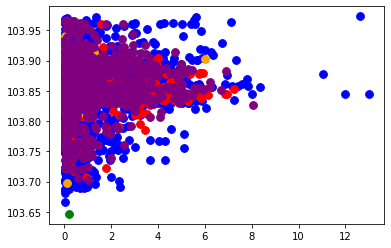

In [183]:
plt.scatter(df['reviews_per_month'][df.label == 0], df["longitude"][df.label == 0], c='blue', s=60)
plt.scatter(df['reviews_per_month'][df.label == 1], df["longitude"][df.label == 1], c='red', s=60)
plt.scatter(df['reviews_per_month'][df.label == 2], df["longitude"][df.label == 2], c='green', s=60)
plt.scatter(df['reviews_per_month'][df.label == 3], df["longitude"][df.label == 3], c='orange', s=60)
plt.scatter(df['reviews_per_month'][df.label == 4], df["longitude"][df.label == 4], c='purple', s=60)


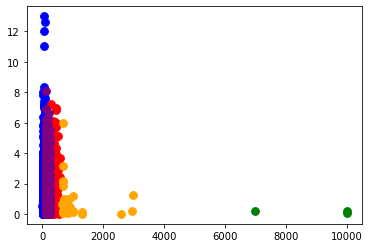

In [181]:
plt.scatter(df['price'][df.label == 0], df["reviews_per_month"][df.label == 0], c='blue', s=60)
plt.scatter(df['price'][df.label == 1], df["reviews_per_month"][df.label == 1], c='red', s=60)
plt.scatter(df['price'][df.label == 2], df["reviews_per_month"][df.label == 2], c='green', s=60)
plt.scatter(df['price'][df.label == 3], df["reviews_per_month"][df.label == 3], c='orange', s=60)
plt.scatter(df['price'][df.label == 4], df["reviews_per_month"][df.label == 4], c='purple', s=60)


### Pytorch

In [169]:
import torch
from kmeans_pytorch import kmeans

In [173]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=5, distance='euclidean', device=torch.device(device))
df["label"] = c
print(df['label'].unique())

[running kmeans]: 26it [00:00, 132.12it/s, center_shift=3.951800, iteration=27, tol=0.000100]    

running k-means on cpu..


[running kmeans]: 28it [00:00, 137.05it/s, center_shift=0.000000, iteration=28, tol=0.000100]

[0 4 1 3 2]


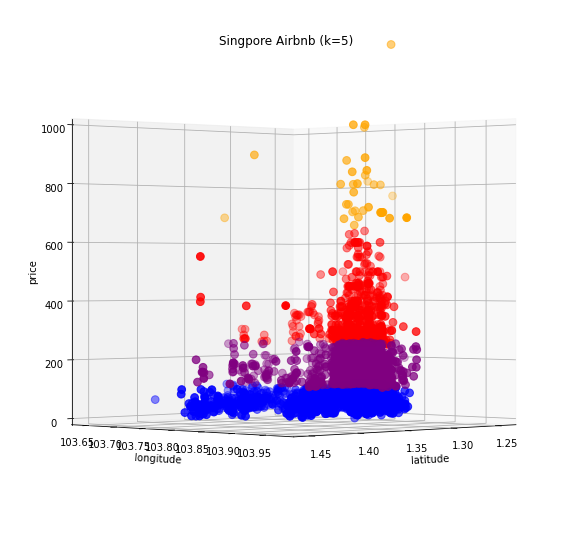

In [176]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['latitude'][df.label == 0], df["longitude"][df.label == 0], df["price"][df.label == 0], c='blue', s=60)
ax.scatter(df['latitude'][df.label == 1], df["longitude"][df.label == 1], df["price"][df.label == 1], c='red', s=60)
ax.scatter(df['latitude'][df.label == 2], df["longitude"][df.label == 2], df["price"][df.label == 2], c='green', s=60)
ax.scatter(df['latitude'][df.label == 3], df["longitude"][df.label == 3], df["price"][df.label == 3], c='orange', s=60)
ax.scatter(df['latitude'][df.label == 4], df["longitude"][df.label == 4], df["price"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("latitude")
plt.ylabel("longitude")
ax.set_zlabel('price')
ax.set_zlim3d(0, 1000)
plt.title('Singpore Airbnb (k=5)')
plt.show()

### Report
Under this assignment we were asked to perform k-means clusing on a dataset taken from Kaggle. The dataset used in this lab is called an 'airbnb' which contains data of singapore airbnb.

After the data is imported, only some columns were selected to be fed into the model. The selected columns are 'latitude','longitude','price' and 'review_per_month'
Since some rows contain Nan, it was also necessary to remove those in order to make sure that they dont interfere with our results.

However, before feeding the data into our k-means model, one important hyperparameter has to be chosen, which is the number of clusters 'k' we would like to used.
Therefore, it is important to find a suitable k. In order to do so, we looped through k's (1-20) to test whether which number of clusters is most suitable for our data set.
The results were plotted in the graph above wuth number of k vs distortion. As you can see, distortion decreases expoenential with a clear 'elbow' at around 5.
As a result, the number of clusters is decided to be 5

I then perform k-means clustering with k as 5 both from the code provided in the lab class as well as pytorch.
The graphs plotted from the two methods can be seen above